# Projet "Capitals Learning"
## Classification d'images de capitales du monde

Groupe : Paul ANACLET, Nicolas CORMARY, Sylvain CROUZET, Théo DESPRATS

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from models.basic_model_1 import basic_model_1
from features.load_data import load_data
from features.get_classes import get_classes
from data.dispatch_data import dispatch_data
from visualization.plot_classes_repartition import plot_classes_repartition
from visualization.plot_training_analysis import plot_training_analysis

## Chargement des données

### Répartition des images

In [4]:
# Répartition des images dans les différents datasets
pourcentageTrain = 70
pourcentageTest = 15
pourcentageValidation = 15

dispatch_data(pourcentageTrain, pourcentageTest, pourcentageValidation)


Images successfully dispatched.


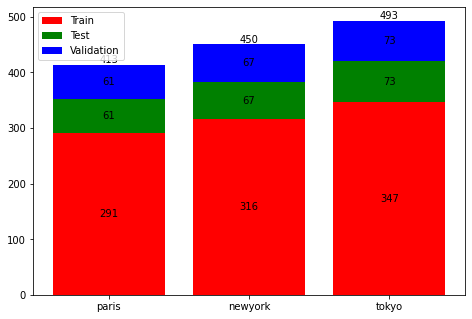

In [5]:
plot_classes_repartition()

### Chargement des images

In [6]:
CLASSES = get_classes()
IMAGE_SIZE = 64

x_train, y_train = load_data(dataset='train', image_size=IMAGE_SIZE)
x_val, y_val = load_data(dataset='validation', image_size=IMAGE_SIZE)
x_test, y_test = load_data(dataset='test', image_size=IMAGE_SIZE)

# Normalisation des entrées via une division par 255 des valeurs de pixel.
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

### Visualisation des images

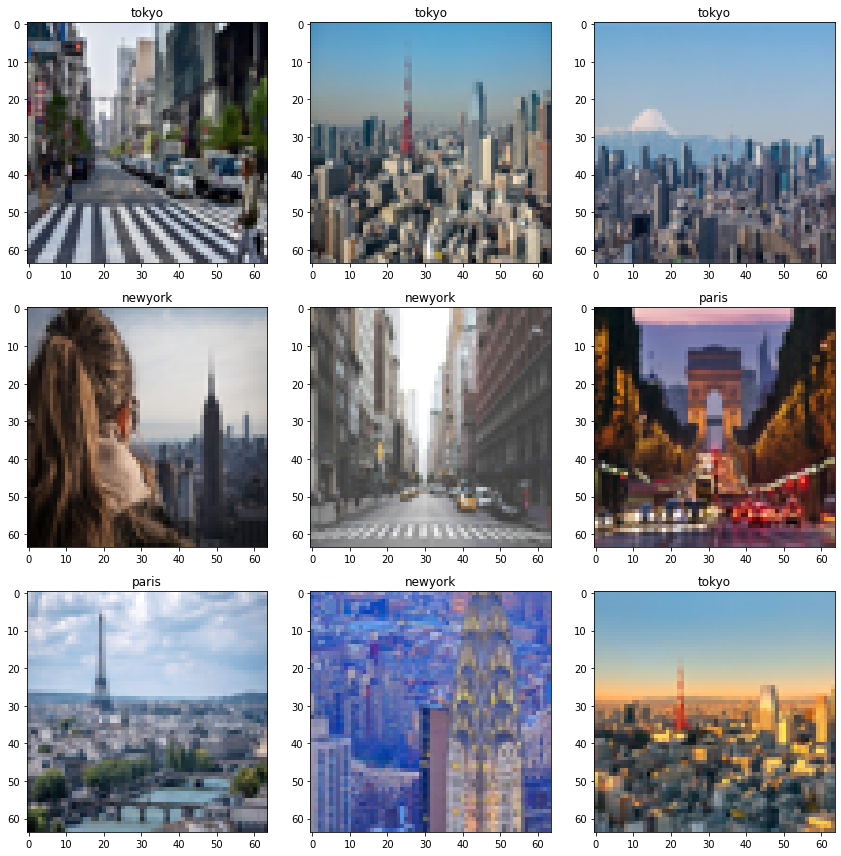

In [7]:
%matplotlib inline

# Randomisation des indices et affichage de 9 images alétoires de la base d'apprentissage
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.title(CLASSES[int(y_train[indices[i]])])
    plt.imshow(x_train[indices[i]])
plt.tight_layout()
plt.show()

### Modele

In [8]:
model = basic_model_1(CLASSES, IMAGE_SIZE)

2022-04-18 16:08:52.454732: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2022-04-18 16:08:52.454783: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-G5H540C3): /proc/driver/nvidia/version does not exist
2022-04-18 16:08:52.455398: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 96)         0

### Entrainement

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=10)

Epoch 1/20
96/96 [==============================] - 3s 24ms/step - loss: 1.0926 - accuracy: 0.3532 - val_loss: 1.0001 - val_accuracy: 0.5124
Epoch 2/20
96/96 [==============================] - 2s 22ms/step - loss: 1.0402 - accuracy: 0.4340 - val_loss: 1.0249 - val_accuracy: 0.4826
Epoch 3/20
96/96 [==============================] - 2s 22ms/step - loss: 0.9964 - accuracy: 0.5115 - val_loss: 1.0369 - val_accuracy: 0.4527
Epoch 4/20
96/96 [==============================] - 2s 22ms/step - loss: 0.9722 - accuracy: 0.5398 - val_loss: 0.9478 - val_accuracy: 0.5373
Epoch 5/20
96/96 [==============================] - 2s 22ms/step - loss: 0.9698 - accuracy: 0.5210 - val_loss: 0.9504 - val_accuracy: 0.5274
Epoch 6/20
96/96 [==============================] - 2s 22ms/step - loss: 0.9362 - accuracy: 0.5482 - val_loss: 0.9276 - val_accuracy: 0.5274
Epoch 7/20
96/96 [==============================] - 2s 22ms/step - loss: 0.9263 - accuracy: 0.5671 - val_loss: 0.9736 - val_accuracy: 0.5323
Epoch 8/20
96

### Analyse des résultats du modèle

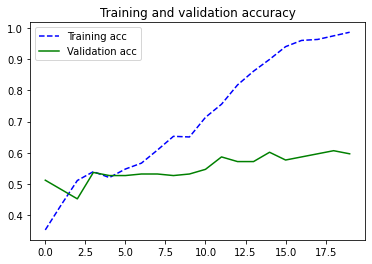

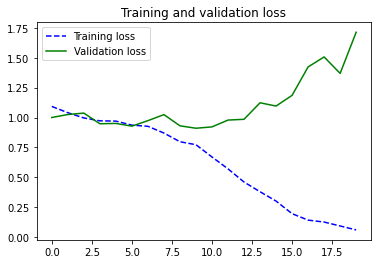

In [12]:
plot_training_analysis(history)